In [1]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.datasets import make_blobs
import numpy as np
%matplotlib inline
import scipy
import time
import networkx as nx
import collections
from collections import defaultdict
import random
import pandas as pd

from models_updated import *
import networkx as nx

sns.set(style='white', context='poster', rc={'figure.figsize':(8,6)})
#default_seed = 16


/home/u58373/.local/lib/python3.7/site-packages/numba/core/cpu.py:78: UserWarning: Numba extension module 'sdc' failed to load due to 'VersionConflict((numba 0.52.0 (/home/u58373/.local/lib/python3.7/site-packages), Requirement.parse('numba<0.52,>=0.51.2')))'.
  numba.core.entrypoints.init_all()


In [2]:
def ipfnA(data, n_neighbors):
    #s= no of points
    #c_arr = Array of centers
    #sd = std. dev.
    #n = n_neighbors 
#     print([s,c_arr, sd, n_neighbors])

    
    r = np.random.RandomState(10)
    coo_matrix1 = umap.fuzzy_simplicial_set(data,n_neighbors,r,'euclidean')
    coo_matrix1 = np.asarray(coo_matrix1)
    sparse_matrix = coo_matrix1[0]
    #print(sparse_matrix.getnnz()

    return nx.from_scipy_sparse_matrix(sparse_matrix)
    

In [3]:
arr = 1000
c_arr1=[[1,1]]
c_arr2 = [[1,21]]
sd = 3

In [4]:
data1,y = make_blobs(n_samples=arr,n_features=2,random_state=16, centers=c_arr1 ,cluster_std=sd)

In [5]:
graph = ipfnA(data1,30)

/home/u58373/.local/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [6]:
data2,y = make_blobs(n_samples=arr,n_features=2,random_state=16, centers=c_arr2 ,cluster_std=sd)

In [7]:
import pickle
data = data2
with open('cluster2.pkl', 'wb') as outfile:
    pickle.dump(data, outfile, pickle.HIGHEST_PROTOCOL)

In [8]:
graph1 = ipfnA(data2,10)

/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


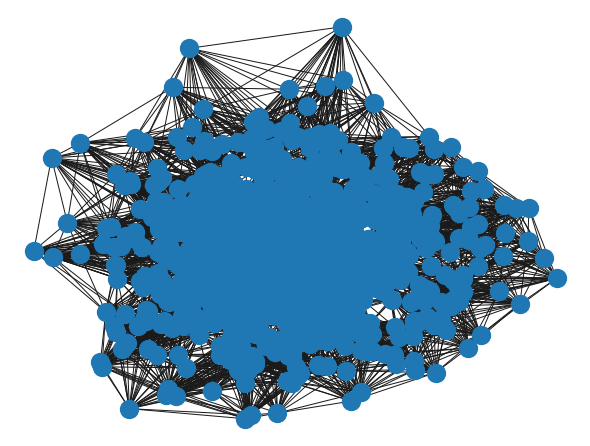

In [9]:
nx.draw(graph,pos=data1)

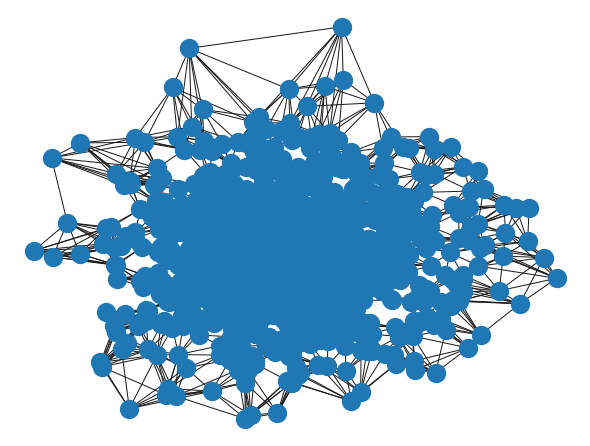

In [10]:
nx.draw(graph1,pos=data2)

In [11]:
graph2 = nx.disjoint_union(graph,graph1)


In [3]:
import statistics

In [13]:
SIGMA  = 1/5.2
GAMMA  = 1/10
s=2000
R0     = 2.5
BETA   = 1/(1/GAMMA) * R0
model_base = SEIRSNetworkModel(G       = graph2, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = s*0.30, initI = s*0.1)

t = 0.00
t = 10.03
t = 20.01
t = 30.16
t = 40.10
t = 50.78
t = 60.01
t = 80.62
t = 90.60


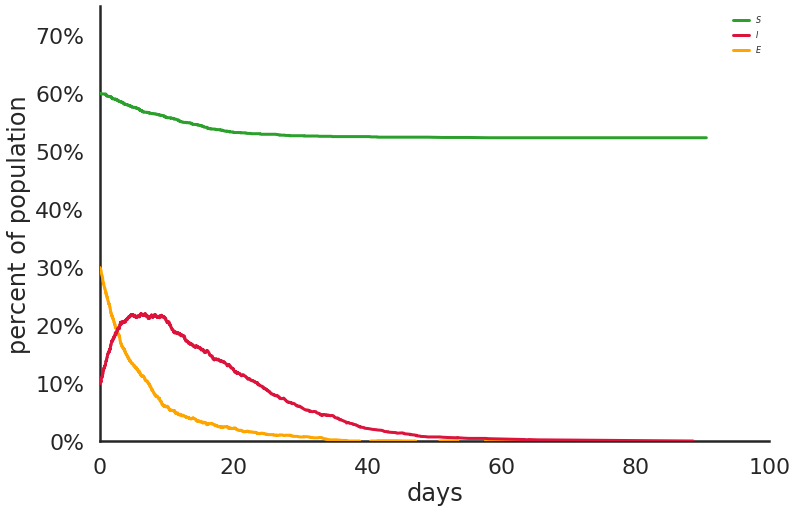

In [16]:
y,x,t,tp,npl,avg,stdv = ipfnB(graph2,2000)

In [17]:
print(y,x,t,tp,npl,avg,stdv)

0.2205 6.783881390484732 0.47650000000000003 40.00380320103349 [2.9960326379385185, 10.599602282557118] 0.1587778375470683 0.058226621714371644


In [10]:
def ipfnB(G1,s):
#s = no of points
    SIGMA  = 1/5.2
    GAMMA  = 1/10
    MU_I   = 0.002

    R0     = 2.5
    BETA   = 1/(1/GAMMA) * R0
    BETA_Q = 0.5*BETA

    P      = 0.2
    Q      = 0.05
    
    model_base = SEIRSNetworkModel(G       = G1, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = s*0.15, initI = s*0.05)
    
    model_base.run(T=300)
    fig,axs = model_base.figure_basic(ylim=0.75,xlim=100)
    
    line = axs.lines[1]
    p = line.get_data()
    p0 = p[0].compressed()
    p1 = p[1].compressed()
    #Maximum
    m = max(p[1])
    #Days Max
    ind= numpy.argmax(p[1])
    d = p[0][numpy.argmax(p[1])]
    #Mean and St Deviation
    mean  = statistics.mean(p1)
    stdev =  statistics.stdev(p1)
    line1 = axs.lines[2]
    w = line1.get_data()
    #Total Infections
    tot = 1 -(w[1][w[1].shape[0]-1])
    tp = 0.1*m
    np = 0.9*m
    #Ten Percent
    tpl =[]
    for i in range(len(p1)):
        x = numpy.abs(p1[i]-tp)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            tpl.append(p0[i])
    tplval = statistics.mean(tpl)
    
    #Ninety Percent
    nplfh =[]
    nplsh = []
    for i in range(ind):
        x = numpy.abs(p1[i]-np)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            nplfh.append(p0[i])
    for i in range(ind, len(p1)):
        x = numpy.abs(p1[i]-np)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            nplsh.append(p0[i])
    npl=[(statistics.mean(nplfh)),(statistics.mean(nplsh))]
    
    
    return m,d,tot,tplval,npl, mean, stdev

In [49]:
model_base.X

array([[2],
       [2],
       [2],
       ...,
       [1],
       [1],
       [1]])

t = 0.00
t = 10.00
t = 20.01
t = 30.47
t = 40.02
t = 50.51
t = 60.50
t = 80.79


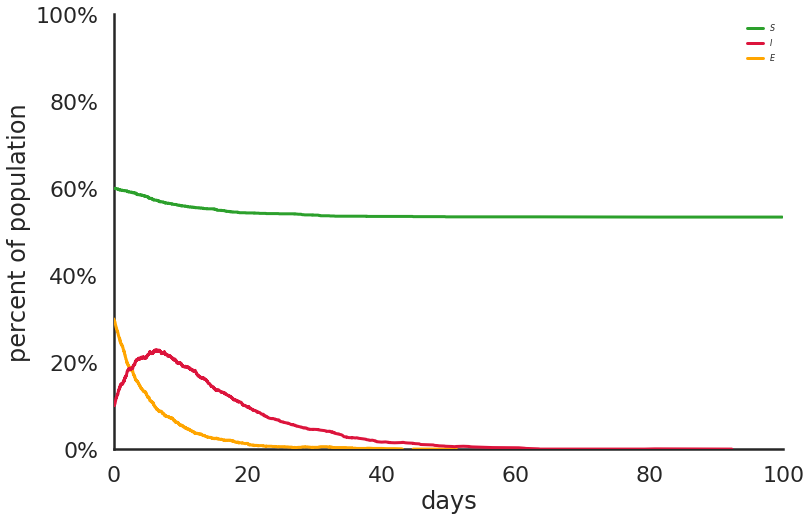

In [50]:
model_base.run(T=300)
fig,axs = model_base.figure_basic(ylim=1,xlim=100)

In [18]:
d3 =[]
for i in data1:
    d3.append(i)
for k in data2:
    d3.append(k)
d3 = np.asarray(d3)

In [46]:
import pickle
data = d3
with open('cluster_combine.pkl', 'wb') as outfile:
    pickle.dump(data, outfile, pickle.HIGHEST_PROTOCOL)

In [47]:
with open('cluster_combine.pkl', 'rb') as infile:
    result = pickle.load(infile)

In [28]:
d3

array([[ 3.04748926e+00,  8.56265351e-01],
       [ 7.62777221e-01, -7.21913227e-03],
       [ 1.33282328e+00, -2.00554999e+00],
       ...,
       [-2.39348378e+00,  1.76722557e+01],
       [-2.64876186e+00,  2.19461222e+01],
       [-3.26935668e-03,  2.13746533e+01]])

IndexError: list index out of range

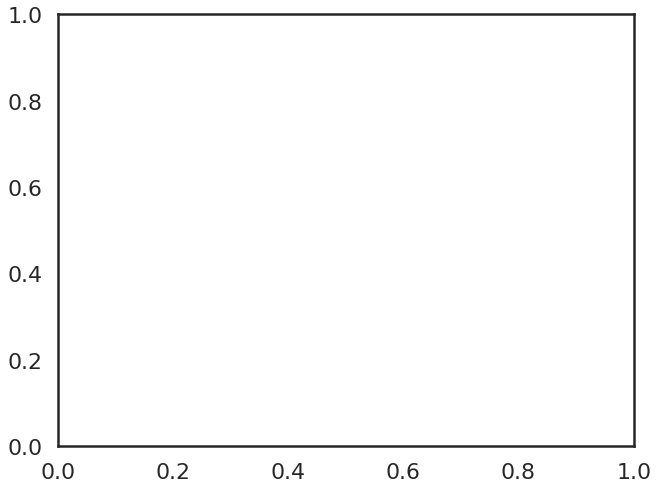

In [12]:
nx.draw(graph2, pos = d3)

In [19]:
graph3 = ipfnA(d3,30)

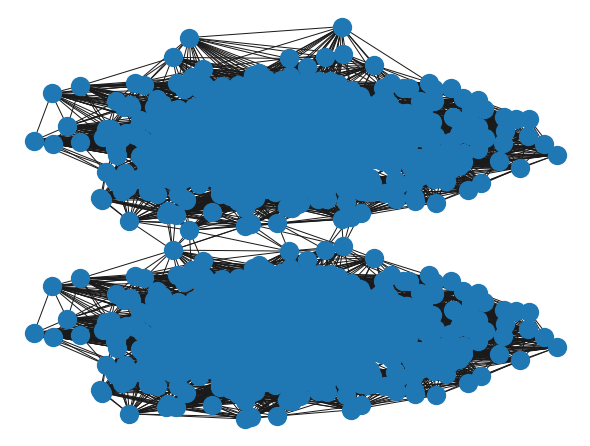

In [214]:
nx.draw(graph3, pos = d3)

t = 0.00
t = 10.01
t = 20.03
t = 30.04
t = 40.04
t = 50.39


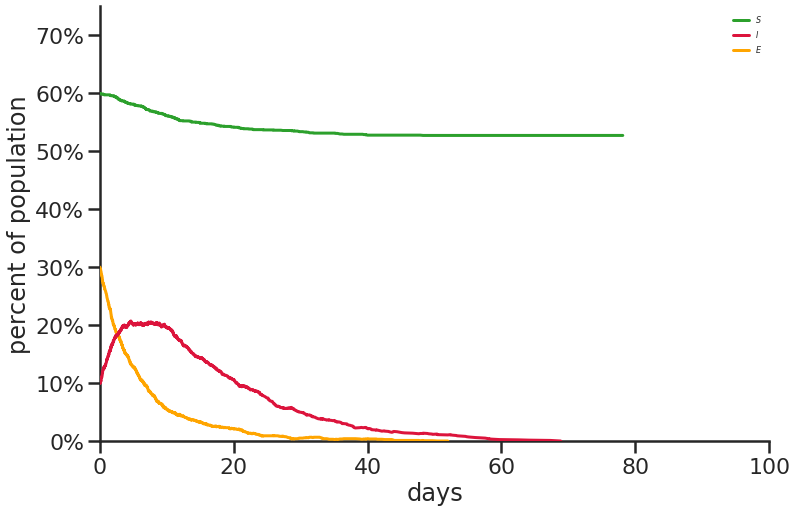

In [20]:
y,x,t,tp,npl,avg,stdv = ipfnB(graph3,2000)

In [21]:
print(y,x,t,tp,npl,avg,stdv)

0.2075 4.650447855963013 0.47250000000000003 40.43873306573843 [2.84675372311619, 10.967152176863838] 0.14955558583106268 0.056701178348319295


In [5]:
import pickle
with open('Cluster Experiments/graph_list.pkl', 'rb') as infile:
    graph_list = pickle.load(infile)

In [9]:
import statistics

In [6]:
Y=[]
X=[]
T=[]
TP=[]
NPL=[]
AVG=[]
STDV=[]

t = 0.00
t = 10.01
t = 20.02
t = 30.05
t = 40.03
t = 50.36
t = 60.34


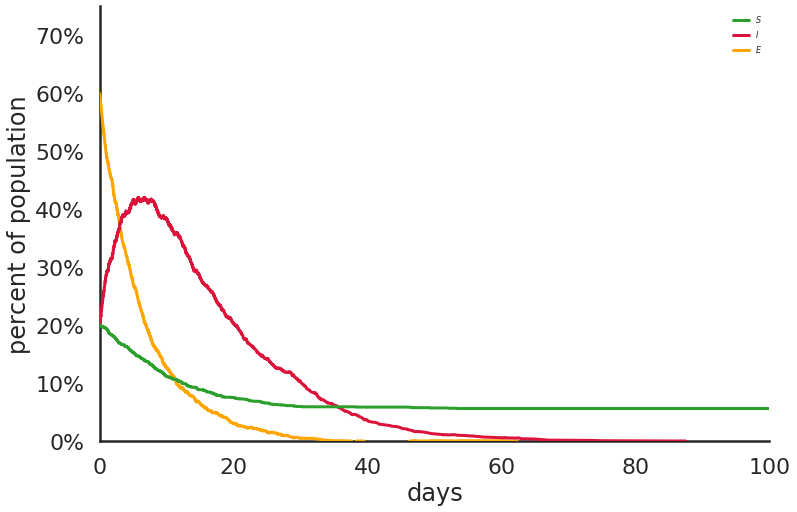

t = 0.01
t = 10.00
t = 20.00
t = 30.11
t = 40.02
t = 50.07
t = 60.57
t = 70.25


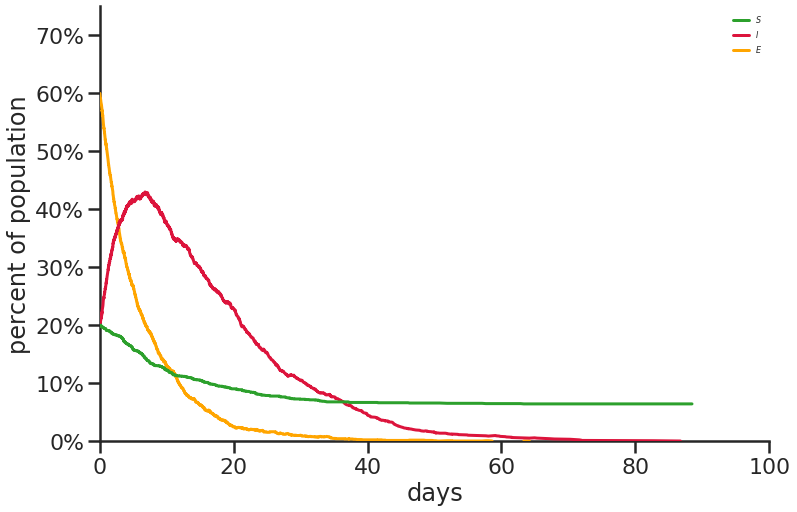

t = 0.00
t = 10.00
t = 20.00
t = 30.12
t = 40.06
t = 50.16
t = 60.02
t = 70.44


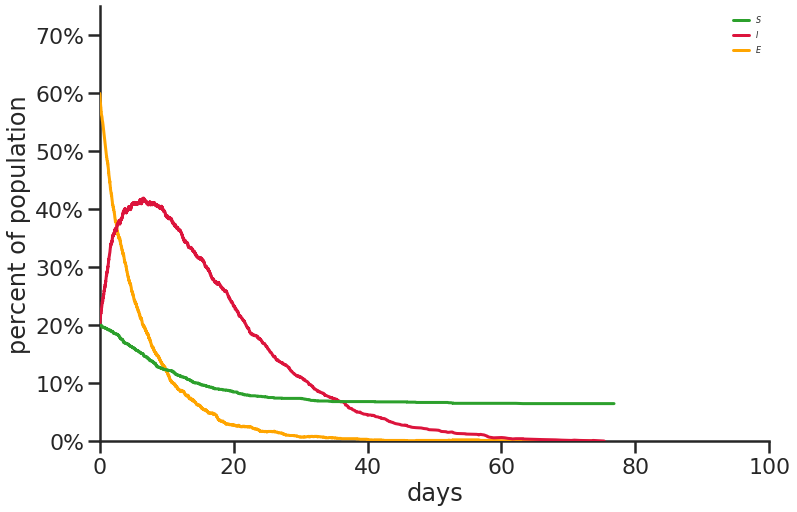

t = 0.00
t = 10.00
t = 20.01
t = 30.05
t = 40.23
t = 50.07
t = 60.72
t = 70.98


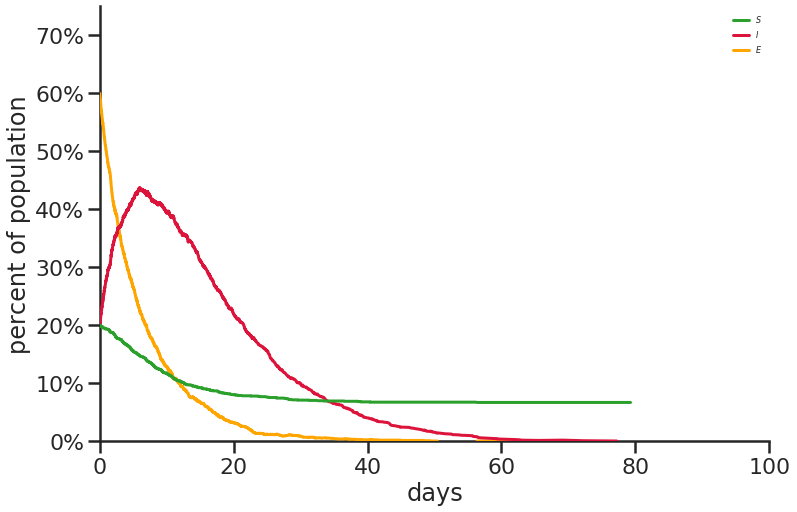

t = 0.00
t = 10.00
t = 20.00
t = 30.14
t = 40.02
t = 50.31
t = 70.75


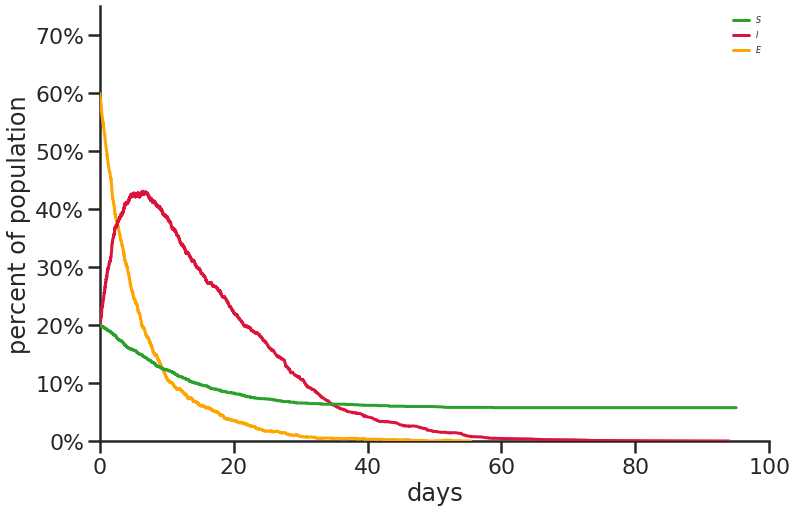

t = 0.00
t = 10.00
t = 20.01
t = 30.01
t = 40.11
t = 50.54
t = 60.18
t = 80.22


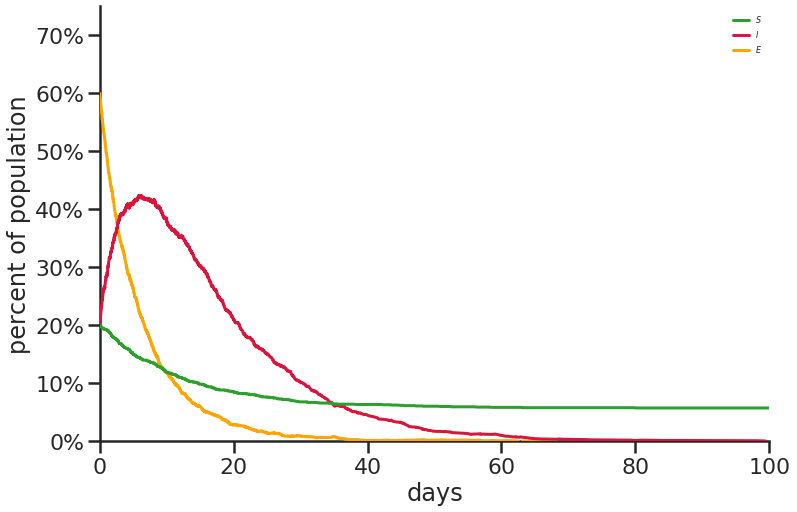

t = 0.00
t = 10.01
t = 20.02
t = 30.03
t = 40.01
t = 50.00
t = 60.61


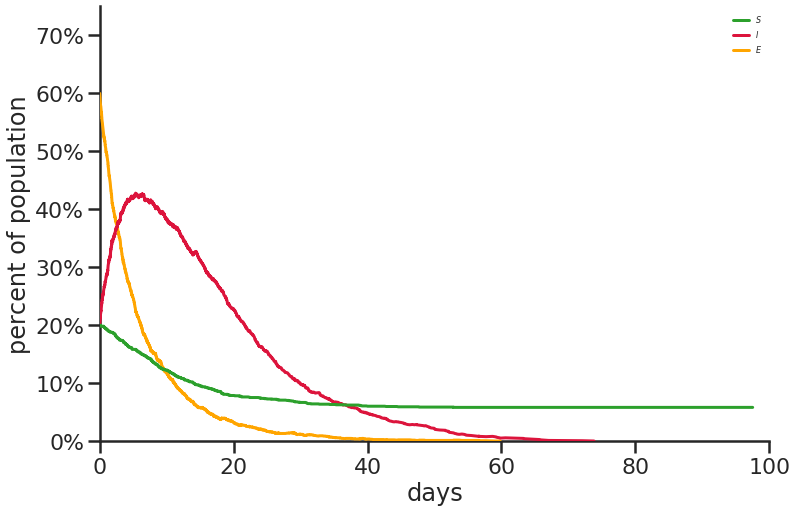

In [7]:
for graph in graph_list:
    y,x,t,tp,npl,avg,stdv = ipfnB(graph,2000)
    Y.append(y)
    X.append(x)
    T.append(t)
    TP.append(tp)
    NPL.append(npl)
    AVG.append(avg)
    STDV.append(stdv)
    

t = 0.01
t = 10.00
t = 20.00
t = 30.04
t = 40.05
t = 50.04
t = 60.45
t = 70.65
t = 80.30


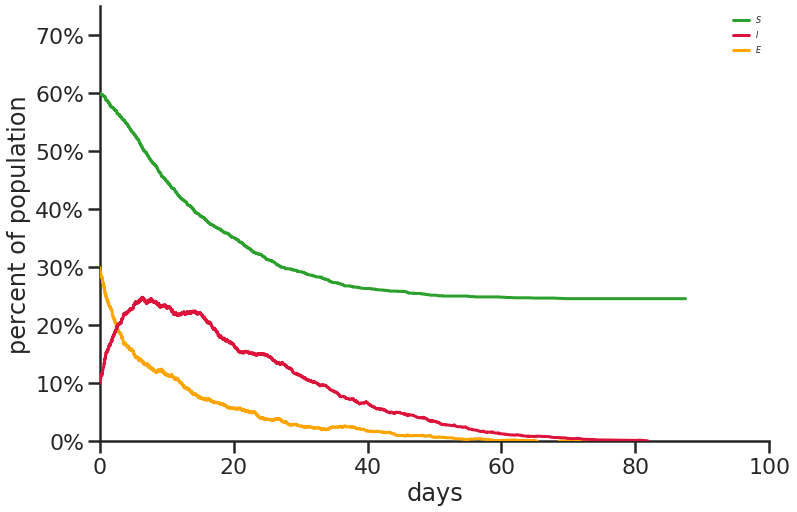

t = 0.00
t = 10.00
t = 20.02
t = 30.02
t = 40.07
t = 50.16
t = 60.54
t = 70.00
t = 110.74


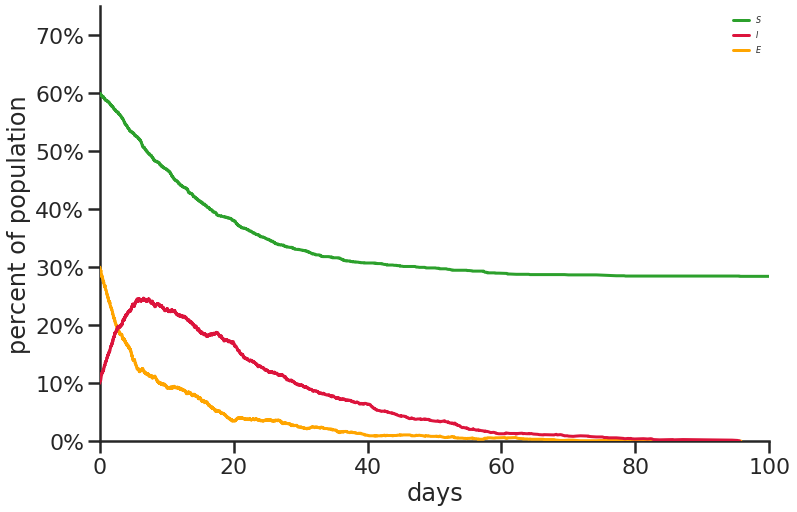

t = 0.00
t = 10.02
t = 20.02
t = 30.00
t = 40.07
t = 50.02
t = 60.03
t = 70.41
t = 80.04
t = 90.28
t = 100.67


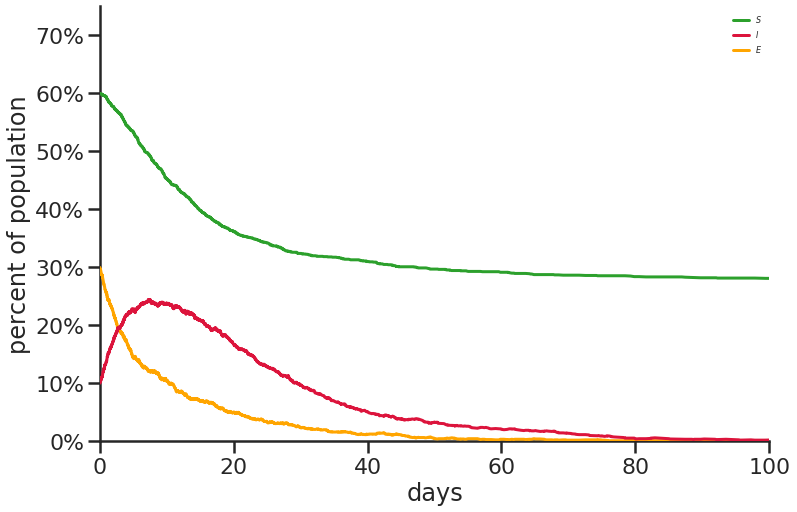

t = 0.01
t = 10.01
t = 20.00
t = 30.02
t = 40.11
t = 50.06
t = 60.13
t = 70.17


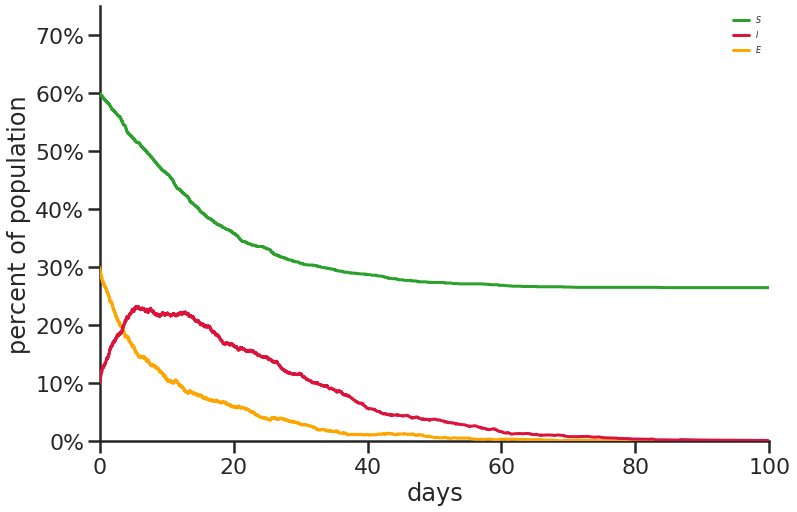

t = 0.01
t = 10.01
t = 20.02
t = 30.01
t = 40.02
t = 50.01
t = 60.01
t = 70.64
t = 80.08
t = 90.82


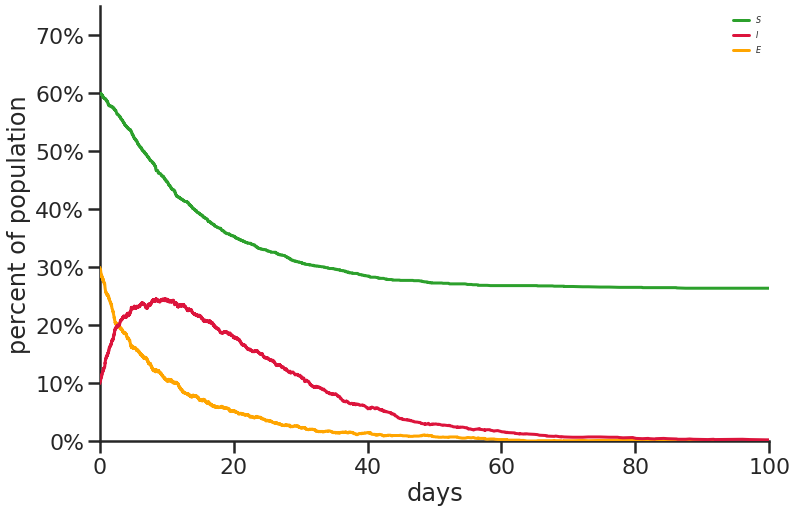

t = 0.00
t = 10.00
t = 20.02
t = 30.02
t = 40.00
t = 50.06
t = 60.03
t = 70.19
t = 80.94
t = 90.24


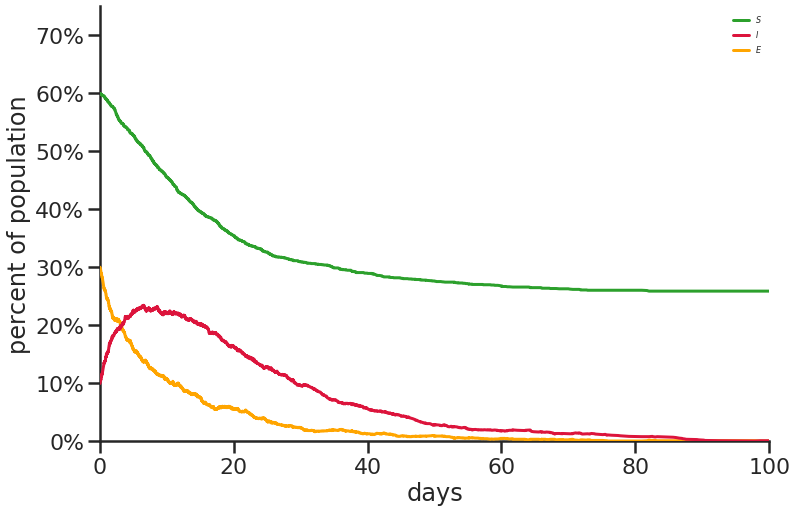

t = 0.01
t = 10.01
t = 20.03
t = 30.02
t = 40.04
t = 50.08
t = 60.02
t = 70.35


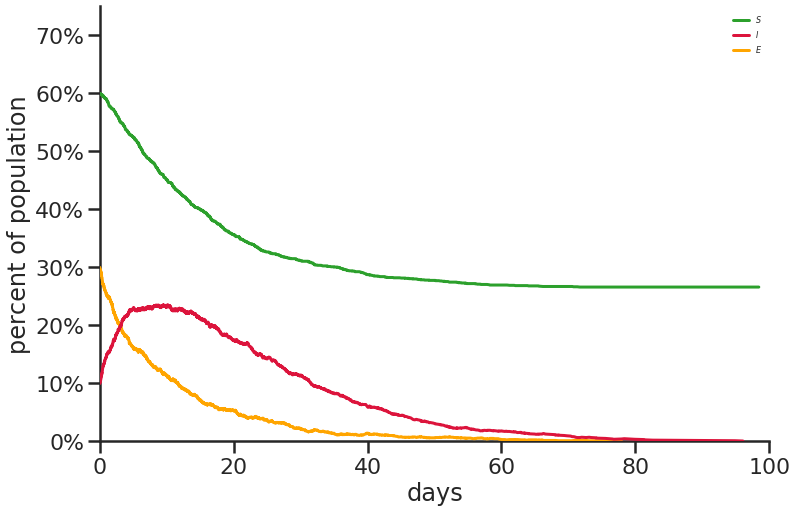

In [9]:
for graph in graph_list:
    y,x,t,tp,npl,avg,stdv = ipfnB(graph,2000)
    Y.append(y)
    X.append(x)
    T.append(t)
    TP.append(tp)
    NPL.append(npl)
    AVG.append(avg)
    STDV.append(stdv)
    

t = 0.00
t = 10.01
t = 20.00
t = 30.05
t = 40.12
t = 50.02
t = 60.12
t = 70.35
t = 80.10
t = 90.23
t = 100.43


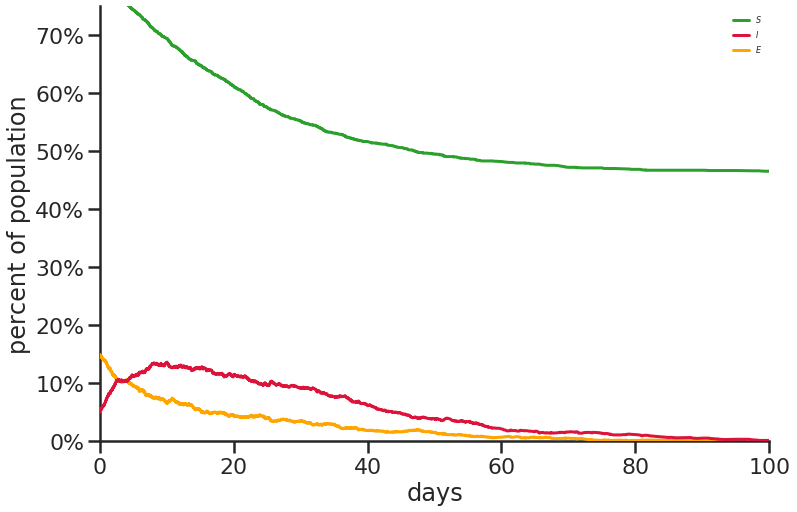

t = 0.00
t = 10.01
t = 20.02
t = 30.00
t = 40.08
t = 50.13
t = 60.59
t = 70.07
t = 80.07
t = 90.87
t = 100.27
t = 150.09


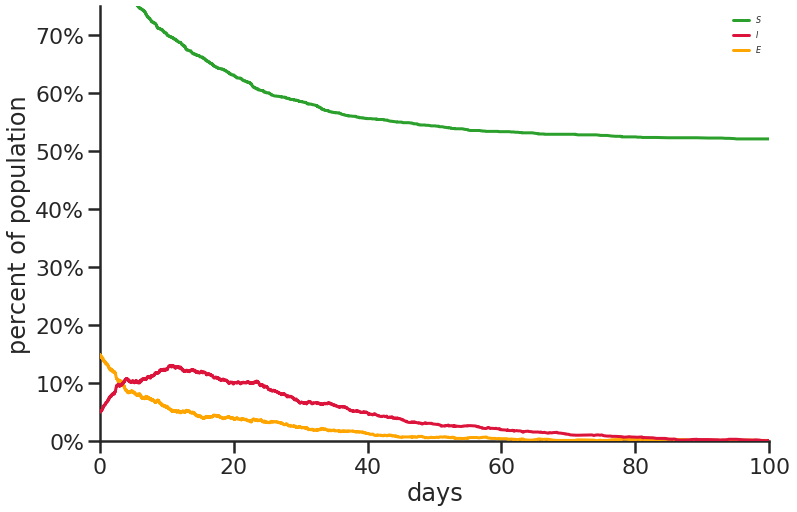

t = 0.01
t = 10.01
t = 20.02
t = 30.12
t = 40.12
t = 50.28
t = 60.00
t = 70.49
t = 80.36
t = 90.08
t = 100.43
t = 110.06
t = 120.49


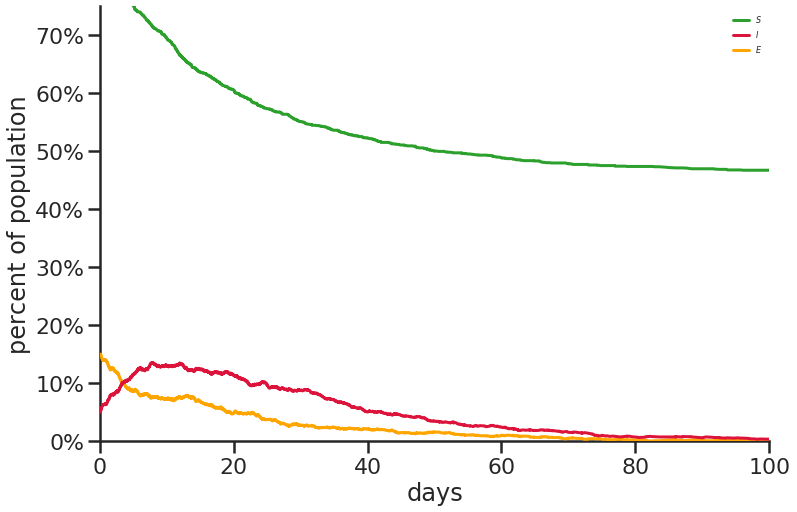

t = 0.00
t = 10.03
t = 20.03
t = 30.00
t = 40.07
t = 50.01
t = 60.04
t = 70.01
t = 80.23
t = 90.39
t = 110.18
t = 120.00


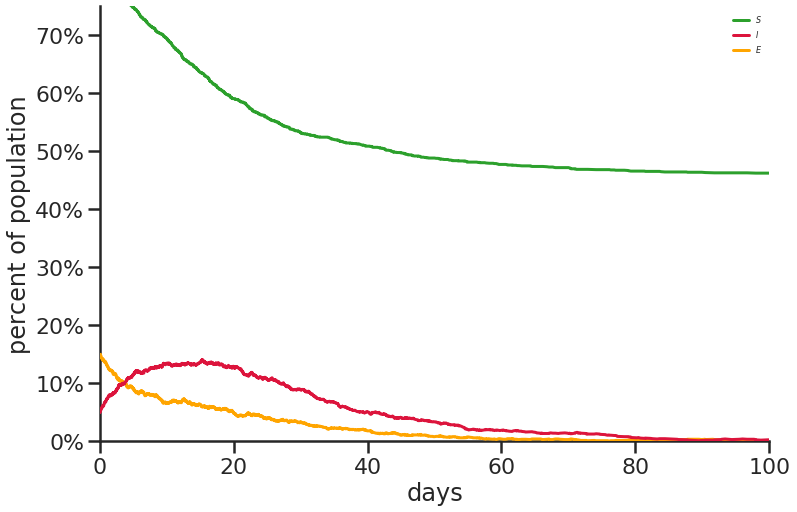

t = 0.01
t = 10.02
t = 20.01
t = 30.00
t = 40.12
t = 50.03
t = 60.09
t = 70.43
t = 80.12
t = 90.49
t = 110.97


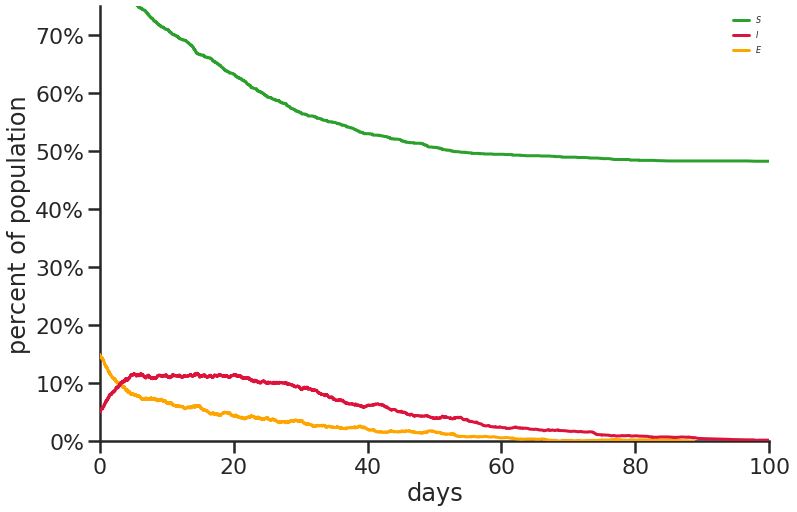

t = 0.03
t = 10.01
t = 20.00
t = 30.03
t = 40.01
t = 50.06
t = 60.02
t = 70.14
t = 80.30
t = 90.33
t = 100.46


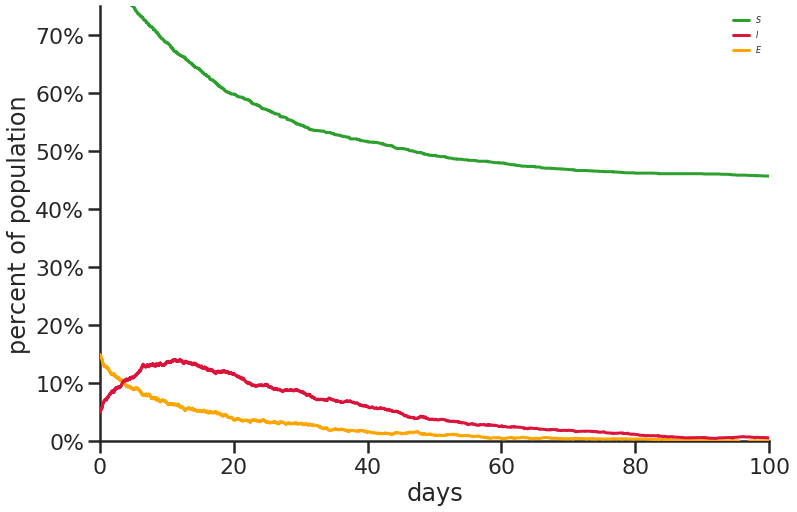

t = 0.00
t = 10.00
t = 20.01
t = 30.02
t = 40.11
t = 50.05
t = 60.06
t = 70.12
t = 80.06
t = 90.64
t = 100.68


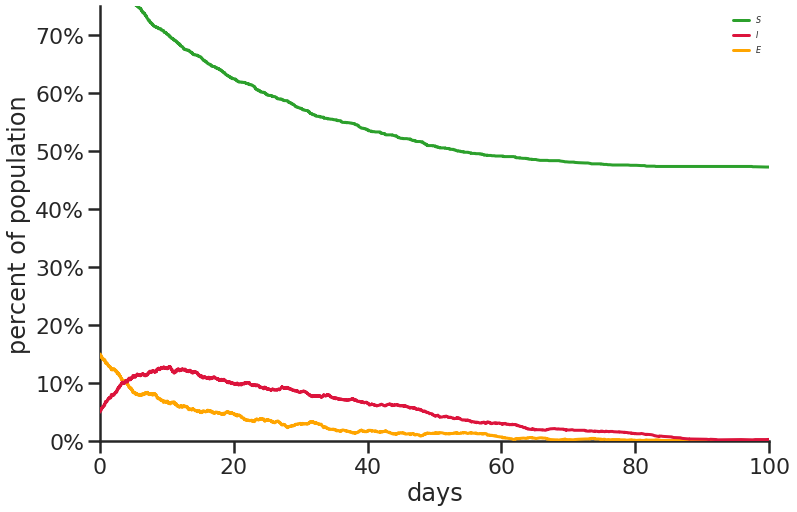

In [11]:
for graph in graph_list:
    y,x,t,tp,npl,avg,stdv = ipfnB(graph,2000)
    Y.append(y)
    X.append(x)
    T.append(t)
    TP.append(tp)
    NPL.append(npl)
    AVG.append(avg)
    STDV.append(stdv)
    

In [12]:
with open('Cluster Experiments/Cases_3_4_5.pkl', 'wb') as outfile:
    pickle.dump([Y,X,T,TP,NPL,AVG,STDV], outfile, pickle.HIGHEST_PROTOCOL)

In [15]:
T

[0.9435,
 0.9355,
 0.935,
 0.933,
 0.942,
 0.9425,
 0.9415,
 0.754,
 0.7155,
 0.7195,
 0.735,
 0.736,
 0.7415,
 0.734,
 0.5345,
 0.48050000000000004,
 0.5355,
 0.5405,
 0.517,
 0.5449999999999999,
 0.528]